## Figure S7 - Displacement estimated from velocity v.s. the one reconstructed from time-series

In [17]:
%matplotlib inline
import os
from pprint import pprint
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt, ticker, dates as mdates
from mintpy.defaults.plot import *
from mintpy.objects import sensor
from mintpy.utils import utils as ut, ptime, plot as pp, readfile
from mintpy import view, save_roipac

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/obs')
os.chdir(work_dir)
print('Go to directory', work_dir)

## Common setting
ref_lat, ref_lon = 31.916, 130.850

Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs


### Reconstruct displacement from time-series

In [18]:
proj_dir_base = os.path.expanduser('~/insarlab/Kirishima')
proj_names = [
    'KirishimaAlosAT424',
    'KirishimaAlosDT73',
    'KirishimaAlos2AT131',
    'KirishimaAlos2DT23',
]
unw1_files = []
unw2_files = []
for proj_name in proj_names:
    vel_file = os.path.join(proj_dir_base, proj_name, 'mintpy/velocity.h5')
    atr = readfile.read_attribute(vel_file)    
    unw1_file = os.path.join(proj_dir_base, proj_name, 'mintpy/{}.unw'.format(atr['DATE12']))
    unw2_file = os.path.join(proj_dir_base, proj_name, 'mintpyAll/{}.unw'.format(atr['DATE12']))
    unw1_files.append(unw1_file)
    unw2_files.append(unw2_file)
pprint(unw1_files)
pprint(unw2_files)

['/Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/20080929_20100705.unw',
 '/Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/20081012_20100302.unw',
 '/Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/20150106_20171010.unw',
 '/Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/20150209_20170918.unw']
['/Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpyAll/20080929_20100705.unw',
 '/Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpyAll/20081012_20100302.unw',
 '/Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpyAll/20150106_20171010.unw',
 '/Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpyAll/20150209_20170918.unw']


save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs/dis_map_vel_vs_ts.png


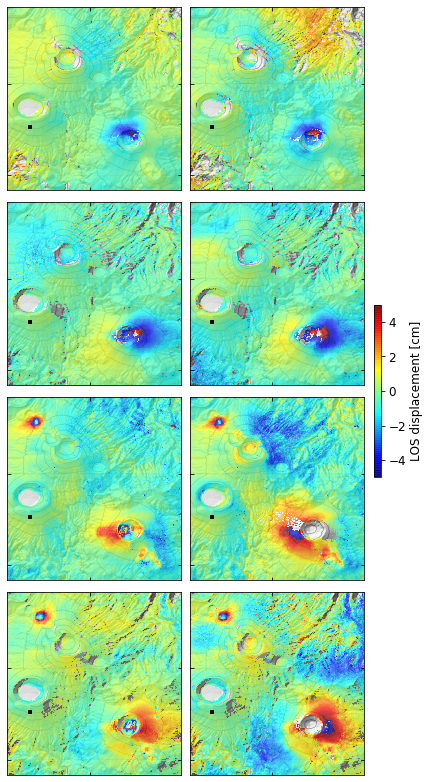

In [28]:
## Plot

# view.py options
dem_file  = os.path.expanduser('~/insarlab/Kirishima/DEM/gsi10m.dem.wgs84')
opt = ' --sub-lat 31.895 31.955 --sub-lon 130.843 130.900 '
opt += '--dem {} --contour-step 100 --contour-smooth 0.0 '.format(dem_file)
opt += ' -c jet --wrap --wrap-range -5 5 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar --noscalebar --alpha 0.7 '
opt += ' --noverbose --lalo-loc 0 0 0 0 '

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=[5.5, 12])
for i in range(len(unw1_files)):
    unw_files = [unw1_files[i], unw2_files[i]]
    for j in range(2):
        ax = axs[i,j]
        cmd = 'view.py {f} {o}'.format(f=unw_files[j], o=opt);
        data, atr, inps = view.prep_slice(cmd)
        ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)
fig.subplots_adjust(hspace=0.01, wspace=0.05, left=0.05, right=0.95, top=0.95, bottom=0.05)

# colorbar
#cax = fig.add_axes([0.35, 0.035, 0.3, 0.01])
cax = fig.add_axes([0.975, 0.4, 0.02, 0.2])
cbar = plt.colorbar(im, cax=cax, orientation='vertical')#, ticks=[-2.5, 0, 2.5])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('LOS displacement [cm]', fontsize=font_size)

# output
out_file = os.path.abspath('dis_map_vel_vs_ts.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()